In [1]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

In [2]:
# RUN ONE TIME!!! 

PATH = os.path.join(os.getcwd())
os.chdir("..")
PATH = os.path.join(os.getcwd(), 'data/raw', 'intents.json')
print(PATH)

/Users/andres/Documents/1Mentor/Chatbot_Keras/data/raw/intents.json


In [4]:
# Open intents.json (Q&A corpus)

with open(PATH) as file:
    data = json.load(file)

In [5]:
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [6]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)


In [7]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token) # adding out of vocabulary token
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [8]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 18)                306       
                                                                 
Total params: 16,850
Trainable params: 16,850
Non-trainable params: 0
____________________________________________________

In [10]:
epochs = 550
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/550


2023-05-04 13:54:21.506276: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3/3 [==============================] - 0s 2ms/step - loss: 2.8917 - accuracy: 0.0588
Epoch 2/550
3/3 [==============================] - 0s 943us/step - loss: 2.8898 - accuracy: 0.1176
Epoch 3/550
3/3 [==============================] - 0s 1ms/step - loss: 2.8889 - accuracy: 0.0941
Epoch 4/550
3/3 [==============================] - 0s 971us/step - loss: 2.8879 - accuracy: 0.0824
Epoch 5/550
3/3 [==============================] - 0s 957us/step - loss: 2.8871 - accuracy: 0.0824
Epoch 6/550
3/3 [==============================] - 0s 967us/step - loss: 2.8862 - accuracy: 0.0824
Epoch 7/550
3/3 [==============================] - 0s 901us/step - loss: 2.8851 - accuracy: 0.0824
Epoch 8/550
3/3 [==============================] - 0s 964us/step - loss: 2.8842 - accuracy: 0.0824
Epoch 9/550
3/3 [==============================] - 0s 877us/step - loss: 2.8831 - accuracy: 0.0824
Epoch 10/550
3/3 [==============================] - 0s 970us/step - loss: 2.8819 - accuracy: 0.0824
Epoch 11/550
3/3 [=======

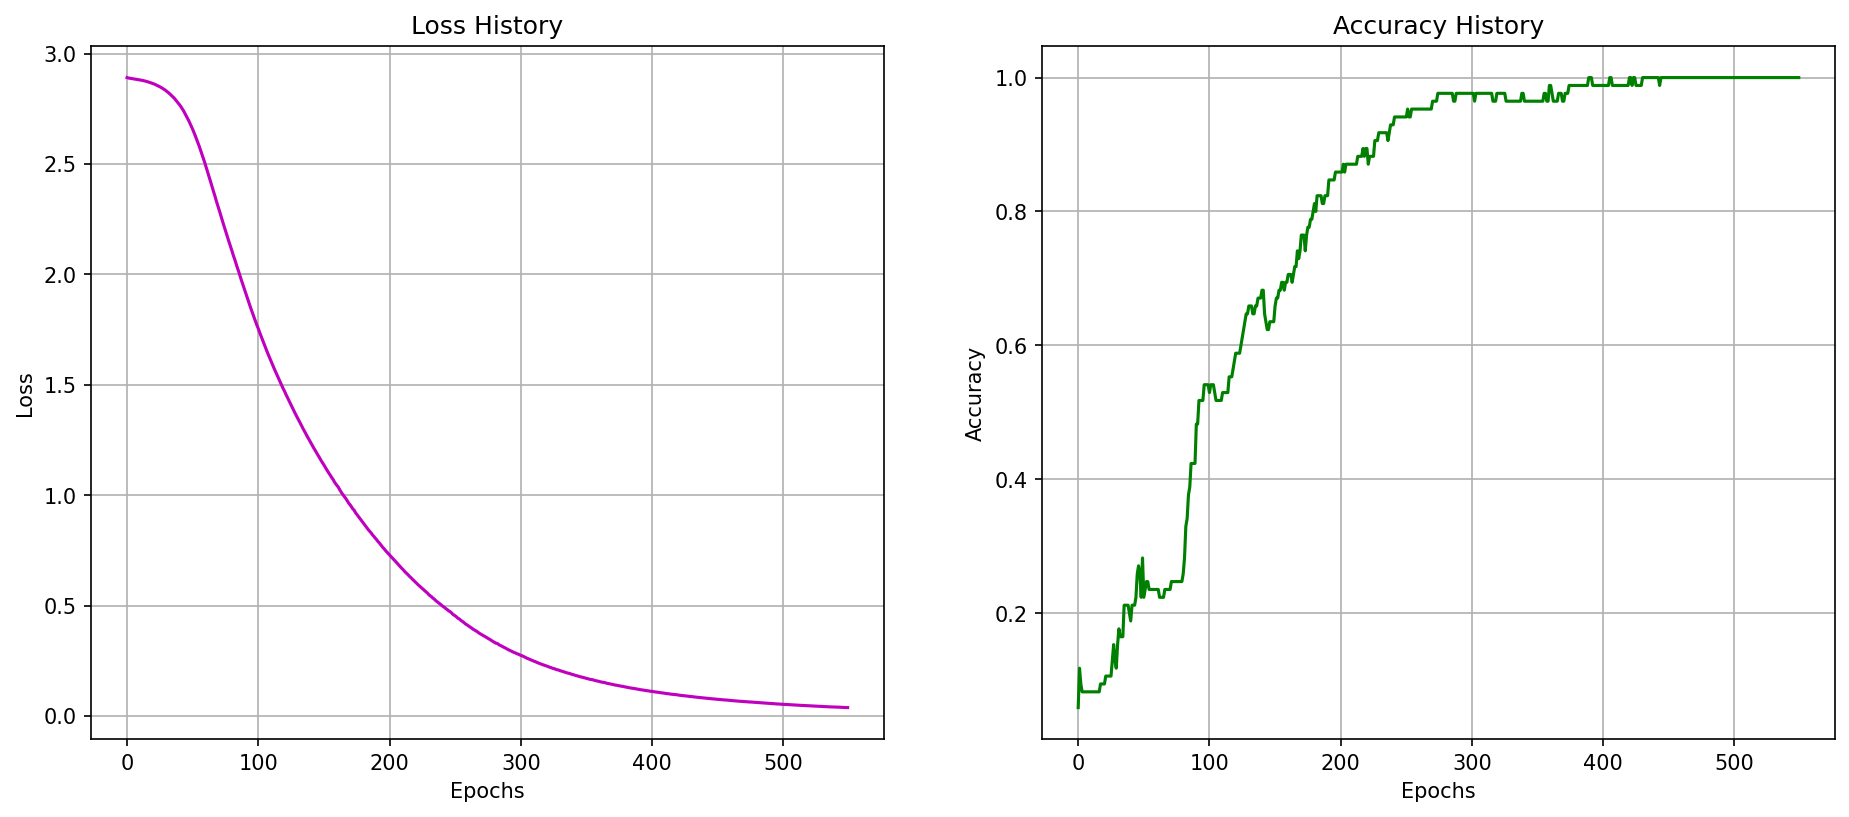

In [11]:
# Figure displays the loss during all epochs

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=150)

ax1.plot([*range(epochs)], history.history['loss'], c='m')
ax1.set_title('Loss History')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()

ax2.plot([*range(epochs)], history.history['accuracy'], c='green')
ax2.set_title('Accuracy History')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
plt.show()

In [12]:
# saving model
model.save("models/chat_model.h5")

import pickle

# saving tokenizer
with open('models/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

# saving label encoder
with open('models/label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)